In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

### Reading [Water Quality](https://www.kaggle.com/datasets/mssmartypants/water-quality) dataset

INITIALIZE DF (load data)

In [78]:
data_df = pd.read_csv('waterQuality1.csv') #read csv
data_df.head() #show first 5 rows of dataset

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1


In [81]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7999 non-null   float64
 1   ammonia      7999 non-null   object 
 2   arsenic      7999 non-null   float64
 3   barium       7999 non-null   float64
 4   cadmium      7999 non-null   float64
 5   chloramine   7999 non-null   float64
 6   chromium     7999 non-null   float64
 7   copper       7999 non-null   float64
 8   flouride     7999 non-null   float64
 9   bacteria     7999 non-null   float64
 10  viruses      7999 non-null   float64
 11  lead         7999 non-null   float64
 12  nitrates     7999 non-null   float64
 13  nitrites     7999 non-null   float64
 14  mercury      7999 non-null   float64
 15  perchlorate  7999 non-null   float64
 16  radium       7999 non-null   float64
 17  selenium     7999 non-null   float64
 18  silver       7999 non-null   float64
 19  uraniu

##### Preprocessing Data of Water Quality

In [82]:
data_df.isnull().sum()

aluminium      0
ammonia        0
arsenic        0
barium         0
cadmium        0
chloramine     0
chromium       0
copper         0
flouride       0
bacteria       0
viruses        0
lead           0
nitrates       0
nitrites       0
mercury        0
perchlorate    0
radium         0
selenium       0
silver         0
uranium        0
is_safe        0
dtype: int64

In [41]:
# Знайдемо рядки зі значенням "#NUM!" і видалимо їх з набору даних
data_df = data_df[data_df != '#NUM!'].dropna()
data_df.shape

(7996, 21)

In [42]:
# Змінюємо тип даних стовпців 'ammonia' та 'is_safe' на стандартний для всіх float64
data_df['ammonia'] = data_df['ammonia'].astype(float)
data_df['is_safe'] = data_df['is_safe'].astype(float)

In [43]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7996 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7996 non-null   float64
 1   ammonia      7996 non-null   float64
 2   arsenic      7996 non-null   float64
 3   barium       7996 non-null   float64
 4   cadmium      7996 non-null   float64
 5   chloramine   7996 non-null   float64
 6   chromium     7996 non-null   float64
 7   copper       7996 non-null   float64
 8   flouride     7996 non-null   float64
 9   bacteria     7996 non-null   float64
 10  viruses      7996 non-null   float64
 11  lead         7996 non-null   float64
 12  nitrates     7996 non-null   float64
 13  nitrites     7996 non-null   float64
 14  mercury      7996 non-null   float64
 15  perchlorate  7996 non-null   float64
 16  radium       7996 non-null   float64
 17  selenium     7996 non-null   float64
 18  silver       7996 non-null   float64
 19  uraniu

#### Train Test Split

In [55]:
X = data_df.drop(['is_safe'], axis = 1)
y = data_df['is_safe']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

#### Standardize the Variables

In [56]:
scaler = StandardScaler()

In [57]:
scaler.fit(X_train)

StandardScaler()

In [58]:
scaled_X_train = scaler.transform(X_train) 
scaled_X_test = scaler.transform(X_test) 

#### KNN model

In [59]:
knn = KNeighborsClassifier(n_neighbors=5)

In [60]:
knn.fit(scaled_X_train, y_train)

KNeighborsClassifier()

In [61]:
pred = knn.predict(scaled_X_test)

#### Evaluation

In [83]:
print(confusion_matrix(y_test,pred))

[[1403   21]
 [ 103   73]]


* LeftTop - кількість True Negatives (TN). Вказує на кількість прикладів, які були правильно класифіковані як негативні (клас 0). <br>

* RightTop - кількість False Positives (FP). Вказує на кількість прикладів, які були неправильно класифіковані як позитивні (клас 1), коли насправді вони належать до класу 0. <br>

* LeftDown - кількість False Negatives (FN). Вказує на кількість прикладів, які були неправильно класифіковані як негативні (клас 0), коли насправді вони належать до класу 1. <br>

* RightDown - кількість True Positives (TP). Вказує на кількість прикладів, які були правильно класифіковані як позитивні (клас 1). <br>

На основі отриманих даних можемо обчислити різні метрики класифікації, такі як точність, чутливість, специфічність, F1-показник та інші, щоб оцінити якість нашої моделі класифікації.

In [65]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

         0.0       0.93      0.98      0.96      1424
         1.0       0.73      0.41      0.53       176

    accuracy                           0.92      1600
   macro avg       0.83      0.70      0.74      1600
weighted avg       0.91      0.92      0.91      1600



Precision (точність):  
* при 0.0 - %TP, вказує на низьку\високу точність, модель має низьку\високу кількість хибно позитивних. <br>
* при 1.0 - %TP, вказує на те, що модель має менше\більше хибно позитивних для цього класу. <br>

Recall (чутливість): 
* при 0.0 - %TP, вказує на низьку\високу чутливість моделі для класу 0.0.
* при 1.0 - %TP, вказує на меншу\більшу чутливість для класу 1.0.

F1-Score (F1-показник) є гармонічним середнім точності та чутливості:
* при 0.0 - вказує на погану\добру якість моделі для класу 0.0.
* при 1.0 - вказує на те, що модель може бути менш\більш ефективною у класифікації цього класу.

Support: кількість прикладів у кожному класі у тестовому наборі даних.

Accuracy (точність): загальна точність моделі, яка вказує на те, наскільки часто модель правильно класифікує приклади.

Macro Avg: середнє значення метрик для всіх класів. В нашому випадку, середнє значення точності, чутливості і F1-показника для всіх класів.

Weighted Avg: середнє значення метрик для всіх класів, де кожен клас зважується на підтримку (кількість прикладів) відповідного класу.

In [66]:
print(accuracy_score(y_test,pred)) #відсоток правильних класифікацій

0.91875


Choosing a K Value

In [67]:
error_rate = []

for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(scaled_X_train,y_train)
    pred_i = knn.predict(scaled_X_test)
    error_rate.append(np.mean(pred_i != y_test))

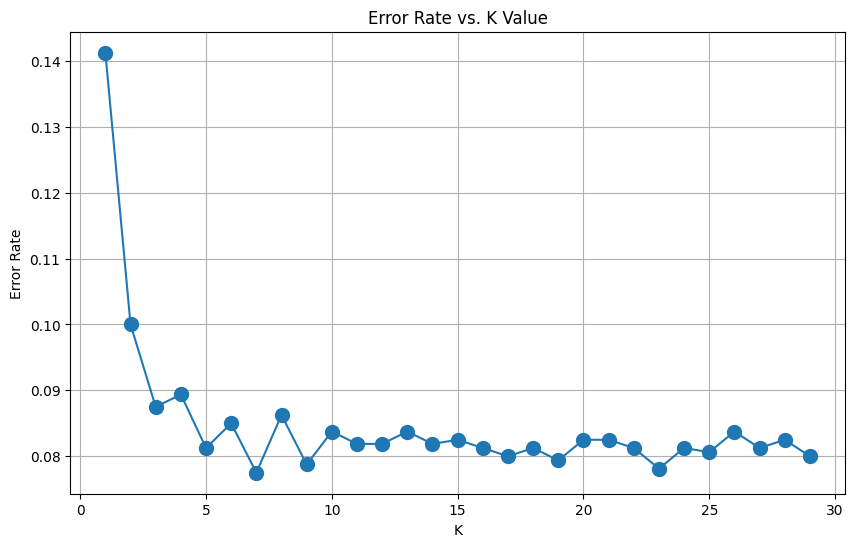

In [68]:
plt.figure(figsize=(10,6))
plt.plot(range(1,30), error_rate, marker='o', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.grid()

На графіку бачимо, як помилка змінюється при різних значеннях k. Оберемо те значення k, яке дає найкращий результат. Зазвичай, оптимальне k обирається на основі критерію мінімізації помилки, тобто те k, при якому помилка досягає свого мінімуму на графіку. В нашому випадку оптимальне значення k = 7.

In [74]:
knn = KNeighborsClassifier(n_neighbors=7)

knn.fit(scaled_X_train,y_train)
pred = knn.predict(scaled_X_test)

print(confusion_matrix(y_test,pred))
print()
print(classification_report(y_test,pred))

[[1403   21]
 [ 103   73]]

              precision    recall  f1-score   support

         0.0       0.93      0.99      0.96      1424
         1.0       0.78      0.41      0.54       176

    accuracy                           0.92      1600
   macro avg       0.85      0.70      0.75      1600
weighted avg       0.91      0.92      0.91      1600

